Looking at plate effects.

In [4]:
# %load ../start.py
# Load useful extensions
import os
import sys

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 1

# Set up cashdir
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -v -g

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Add project library to path
sys.path.insert(0, '../../lcdb-wf/lib')
sys.path.insert(0, '../../lib/python')

# Set up references
import yaml
with open('../../config/config.yml') as fh:
    config = yaml.load(fh)

assembly = config['assembly']
tag = config['aligner']['tag']
REF = os.path.join(os.environ['REFERENCES_DIR'], assembly, tag)


last updated: 2017-09-20 

CPython 3.5.2
IPython 6.1.0
Git hash: b31c213e0fbaedf9092be694730dd537cd996a08


In [113]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
stable = pd.read_csv('../../config/sampletable.tsv', sep='\t')

In [7]:
stable.head()

,samplename,SRX,BioSample,GEO,drsc,target_FBgn,target_symbol,drsc_rep,rep,plate_id,well_id,plate_row,plate_column
0,SRR3486891,SRX1748887,SAMN04959321,GSM2145154,DRSC07681,FBgn0003396,shn,2,1,1,E8,E,8
1,SRR3486986,SRX1748983,SAMN04959673,GSM2145249,DRSC07681,FBgn0003396,shn,2,2,1,E8,E,8
2,SRR3487576,SRX1749576,SAMN04960293,GSM2145839,DRSC15627,FBgn0038742,Arc42,2,2,4,G4,G,4
3,SRR3487481,SRX1749480,SAMN04960137,GSM2145744,DRSC15627,FBgn0038742,Arc42,2,1,4,G4,G,4
4,SRR3486819,SRX1748815,SAMN04959150,GSM2145082,DRSC32770,FBgn0011715,Snr1,2,2,10,G7,G,7


In [37]:
libsize = pd.read_table('../../rnaseq-wf/data/aggregation/libsizes_table.tsv')

In [132]:
def plate_plot(pnum, rep, ax=None, vmin=0, vmax=20):
    plate = stable.loc[(stable.plate_id == pnum) & (stable.rep == rep)]
    df = libsize.merge(plate, left_on='sample', right_on='samplename', how='right')
    df.sort_values(['plate_column', 'plate_row'], inplace=True)
    dd = df[['cutadapt.fastq.libsize', 'plate_column', 'plate_row']].copy()

    piv = dd.pivot(index='plate_row', columns='plate_column', values='cutadapt.fastq.libsize')
    piv.fillna(0, inplace=True)
    
    sns.heatmap(piv, ax=ax, vmin=vmin, vmax=vmax, )
    ax.set_title('plate {}:rep{}'.format(pnum, rep))

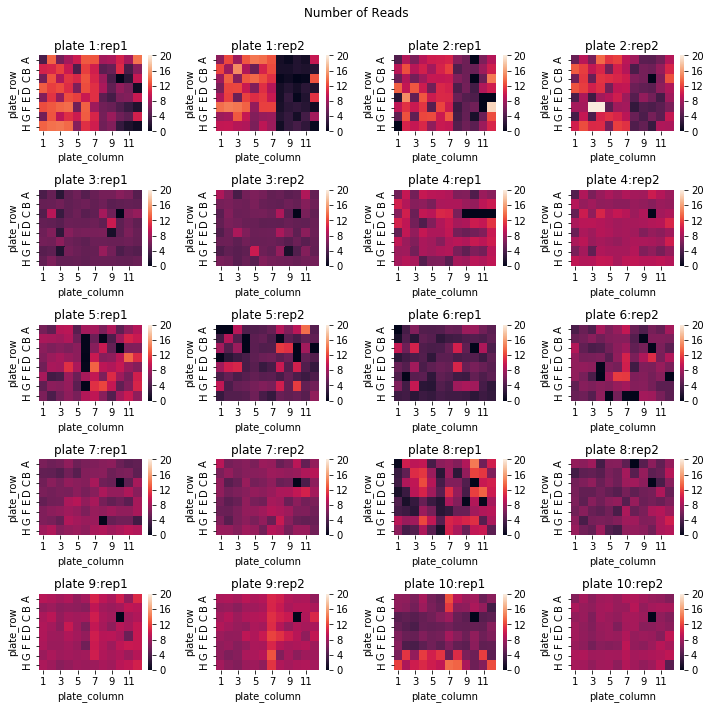

In [137]:
from itertools import product
vals = list(product((1, 2, 3, 4, 5, 6, 7, 8, 9, 10), (1, 2)))

fig, axes = plt.subplots(5, 4, figsize=(10, 10))
for val, ax in zip(vals, axes.flatten()):
    plate_plot(*val, ax=ax)
    
plt.suptitle('Number of Reads')
plt.tight_layout(rect=[0, 0, 1, .95])